In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline
import seaborn as sns               #for visualization
import warnings
warnings.filterwarnings('ignore')

## `Load Airbnb Dataset`

In [54]:
Airbnb_df = pd.read_csv('Airbnb NYC 2019.csv')
Airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## `Data Exploration and Data Cleaning`

In [55]:
Airbnb_df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [56]:
#checking what are the variables here:
Airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### *so now first rename few columns for better understanding of variables*

In [57]:
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}

In [58]:
# use a pandas function to rename the current function
Airbnb_df = Airbnb_df.rename(columns = rename_col)
Airbnb_df.head(2)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [59]:
#checking shape of Airbnb dataset
Airbnb_df.shape

(48895, 16)

In [60]:
#basic information about the dataset
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

So, host_name, neighbourhood_group, neighbourhood and room_type fall into categorical variable category.

While host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 are numerical variables

In [61]:
# check duplicate rows in dataset
Airbnb_df = Airbnb_df.drop_duplicates()
Airbnb_df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

so, there is no any duplicate rows in Dataset

In [62]:
# checking null values of each columns
Airbnb_df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [63]:
Airbnb_df['listing_name'].fillna('unknown',inplace=True)
Airbnb_df['host_name'].fillna('no_name',inplace=True)

In [64]:
#so the null values are removed
Airbnb_df[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

*Now, the columns last_review and reviews_per_month have total 10052 null values each.*

*last_review column is not required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.*

*listing_id also not that much of important for our analysis but i dont remove because of listing_id and listing_name is pair and removing listing_id it still wont make much difference. make sense right ?*

In [65]:
Airbnb_df = Airbnb_df.drop(['last_review'], axis=1)     #removing last_review column beacause of not that much important

In [66]:
Airbnb_df.info()      # the last_review column is deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

*The reviews_per_month column also containing null values and we can simple put 0 reviews by replacing NAN's i think this is make sense*

In [67]:
Airbnb_df['reviews_per_month'] = Airbnb_df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [68]:
# the null values are replaced by 0 value
Airbnb_df['reviews_per_month'].isnull().sum()   

0

### *so there is no null value now in 'reviews_per_month' column because we replaced null value by 0 value. this will make sense because there is no any such data to find those null value*

In [69]:
#so now check Dataset columns changed and null values, last_review column removed.
Airbnb_df.sample(5)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
22195,17876921,Bright Williamsburg Apt Steps from Train,47054725,Katharine,Brooklyn,Williamsburg,40.70937,-73.95903,Entire home/apt,115,4,6,0,1,0
46374,35225838,Cozy room in an apartment in Bushwick!,43283271,Lizzie,Brooklyn,Bushwick,40.70137,-73.92028,Private room,45,2,1,1,1,1
3322,1983531,Spacious Bright 1 Bedroom East Village Apartment,5586949,S & G,Manhattan,East Village,40.72754,-73.98555,Entire home/apt,450,3,12,0,2,0
47372,35709849,Palace of Perhaps (Bushwick/Ridgewood),24294179,Alexander,Queens,Ridgewood,40.70084,-73.90843,Private room,48,1,2,2,1,17
14033,10702489,Charming room in Victorian house,14796247,Sandra And Cary,Brooklyn,Flatbush,40.64266,-73.96492,Private room,49,7,22,0,4,269



### *Check Unique Value for variables and doing some experiment*

In [70]:
# check unique values for listing/property Ids
# all the listing ids are different and each listings are different here.
Airbnb_df['listing_id'].nunique()

48895

In [71]:
# so there are 221 unique neighborhood in Dataset
Airbnb_df['neighbourhood'].nunique()

221

In [72]:
#and total 5 unique neighborhood_group in Dataset
Airbnb_df['neighbourhood_group'].nunique()

5

In [73]:
#so total 11453 different hosts in Airbnb-NYC
Airbnb_df['host_name'].nunique()

11453

In [74]:
# most of the listing/property are different in Dataset
Airbnb_df['listing_name'].nunique()

47906

In [75]:
Airbnb_df[Airbnb_df['host_name']=='David']['listing_name'].nunique()

# so here same host David operates different 402 listing/property

402

In [76]:

Airbnb_df[Airbnb_df['listing_name']==Airbnb_df['host_name']].head()

# there are few listings where the listing/property name and the host have same names

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0,18,90


## `Detecting Outliers`

In [77]:
# describe the DataFrame 
Airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


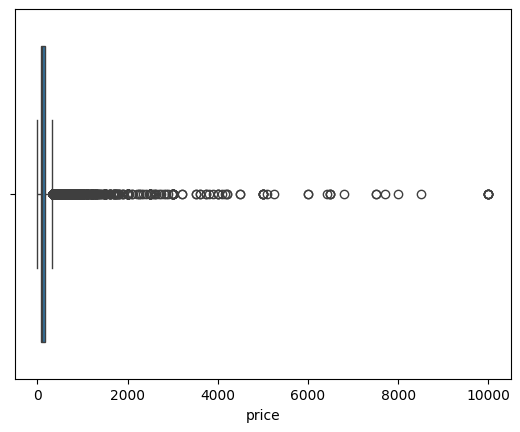

In [78]:
# detction of outliers using boxplot
sns.boxplot(x = Airbnb_df['price'])

plt.show()

### *Removing Ouliers using capping method*

In [79]:
x = Airbnb_df['price'].mean()
y = Airbnb_df['price'].std()
high = x + 3*y
low = x - 3*y

# detecting

Airbnb_df[(Airbnb_df['price'] > high) | (Airbnb_df['price'] < low)].head(5)

# Removing outliers

Airbnb_df['price'] = np.where(Airbnb_df['price'] > high, high, np.where(Airbnb_df['price'] < low, low ,Airbnb_df['price']))

Airbnb_df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0,1,0


## `Data Visualization`

### *(1) Distribution Of Airbnb Bookings Price Range Using Histogram*

Text(0.5, 1.0, 'Distribution of Airbnb Prices')

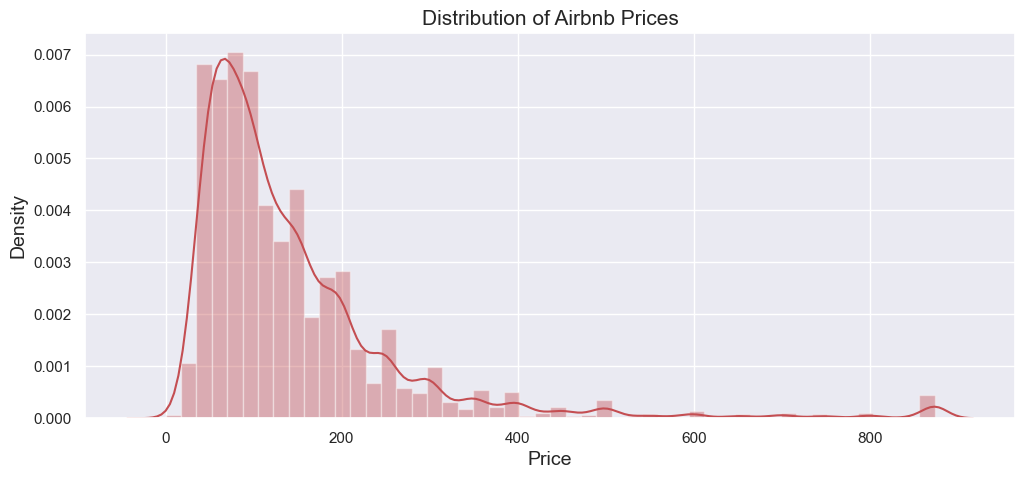

In [80]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.distplot(Airbnb_df['price'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)

### *(2) Total Listing/Property count in Each Neighborhood Group using Count plot*

<Axes: xlabel='Neighborhood_Groups', ylabel='Listing_Counts'>

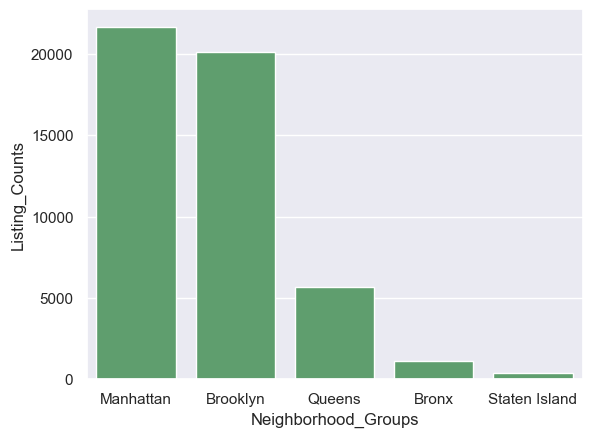

In [81]:
# Count the number of listings in each neighborhood group and store the result in a Pandas series
counts = Airbnb_df['neighbourhood_group'].value_counts()

# Reset the index of the series so that the neighborhood groups become columns in the resulting dataframe
Top_Neighborhood_group = counts.reset_index()

# # Rename the columns of the dataframe to be more descriptive
Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']

# # display the resulting DataFrame
Top_Neighborhood_group

sns.barplot(x='Neighborhood_Groups', y='Listing_Counts', data=Top_Neighborhood_group , color=('g') )